In [5]:
import os
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import sys
sys.path.insert(0, '../code')

import scraper

In [6]:
addr_list = [
    'https://www.towardsdatascience.com',
    'https://towardsdatascience.com/data-science/home',
    'https://towardsdatascience.com/machine-learning/home',
    'https://towardsdatascience.com/programming/home',
    'https://towardsdatascience.com/data-visualization/home',
    'https://towardsdatascience.com/artificial-intelligence/home'
]

articles = []

In [7]:
for addr in addr_list:
    html = scraper.get_html(addr)
    articles.extend(scraper.extract_articles(html))

articles = list(set(articles))

## Add (New) Articles to Local List

In [8]:
if os.path.exists('../data/articles.txt'):
    with open('../data/articles.txt', 'r') as fp:
        old_articles = fp.read().split('\n')
        old_count = len(old_articles)
        print(f"{old_count} already exist.")

    articles.extend(old_articles)
    articles = list(set(articles))

    print(f"{len(articles) - old_count} articles added.")

with open('../data/articles.txt', 'w') as fp:
    fp.write('\n'.join(articles))

334 already exist.
2 articles added.


In [9]:
with open('../data/articles.txt', 'r') as fp:
    articles = fp.read().split('\n')

In [10]:
metrics = scraper.Metrics()

for http in articles:
    print(http)
    try:
        article = scraper.Article(http)
        metrics.add(article)
    except:
        try:
            print("Error, retrying...")
            article = scraper.Article(http)
            metrics.add(article)
        except:
            print('Download Failed.')

https://towardsdatascience.com/how-to-animate-scatterplots-on-mapbox-using-plotly-express-3bb49fe6a5d
Error, retrying...
Download Failed.
https://towardsdatascience.com/new-earth-engine-features-announced-at-geoforgood-summit-2019-57c33ef48bb8
https://towardsdatascience.com/knowing-known-unknowns-with-deep-neural-networks-caac1c4c1f5d
https://towardsdatascience.com/ai-learns-to-multiply-ce844c68aefe
https://towardsdatascience.com/how-to-get-started-in-data-science-af865b3d5231
https://towardsdatascience.com/data-transformation-e39bd132b66
https://towardsdatascience.com/route-66-revisited-mapping-geospatial-data-in-r-371dd406cde0
https://towardsdatascience.com/classifying-shakespeare-with-networks-2a6c1c44e17f
https://towardsdatascience.com/a-data-scientists-practical-guide-to-using-kmeans-ff180878e13b
Error, retrying...
Download Failed.
https://towardsdatascience.com/popular-places-near-me-data-visualization-using-python-and-foursquare-api-4d1683cd62d1
https://towardsdatascience.com/le

In [11]:
metrics.save()

Language data saved to '../data\language.json'
Authors data saved to '../data\authors.json'


In [4]:
count = []
claps = []

for author in metrics.authors:
    count.append((metrics.authors[author]['count'], author))
    claps.append((metrics.authors[author]['claps'], author))

In [7]:
def barplot(data, bucket1, limit1, bucket2, limit2, figsize=(24, 10)):
    fig = plt.figure(figsize=figsize)
    sns.set_style('whitegrid')
    
    bucket_data = []
    counter = 0
    
    for i in range(0, limit1, bucket1):
        text = f"{i}-{i+bucket1}"
        bucket_data.append([text, len(df[(df['claps'] >= i) & (df['claps'] < i+bucket1)])])
        
    for i in range(limit1, limit2, bucket2):
        text = f"{i}-{i+bucket2}"
        bucket_data.append([text, len(df[(df['claps'] >= i) & (df['claps'] < i+bucket2)])])
    
    sns.barplot(x=[n[0] for n in bucket_data], y=[n[1] for n in bucket_data], color='#726EFF')
    plt.plot([9.4999, 9.5001], [0, 120], linestyle='dashed', color='#cfcfcf')
    plt.xticks(rotation='vertical')
    plt.xlabel('Total Claps')
    plt.ylabel('No. Authors')
    plt.rcParams.update({'font.size': 26})
    plt.tight_layout()
    plt.savefig('../assets/claps_dist.png')
    plt.show()

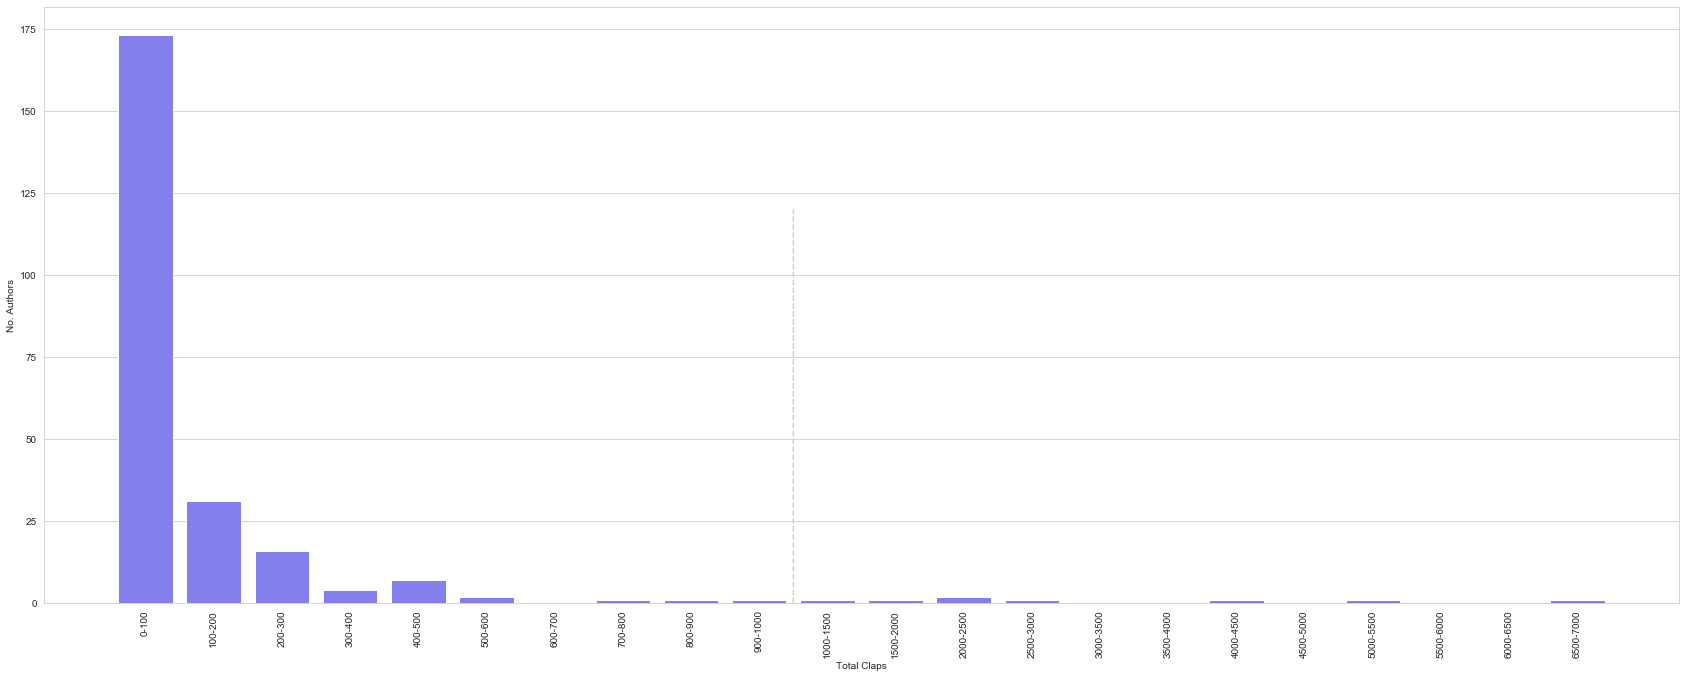

In [8]:
barplot(df, 100, 1000, 500, 7000)

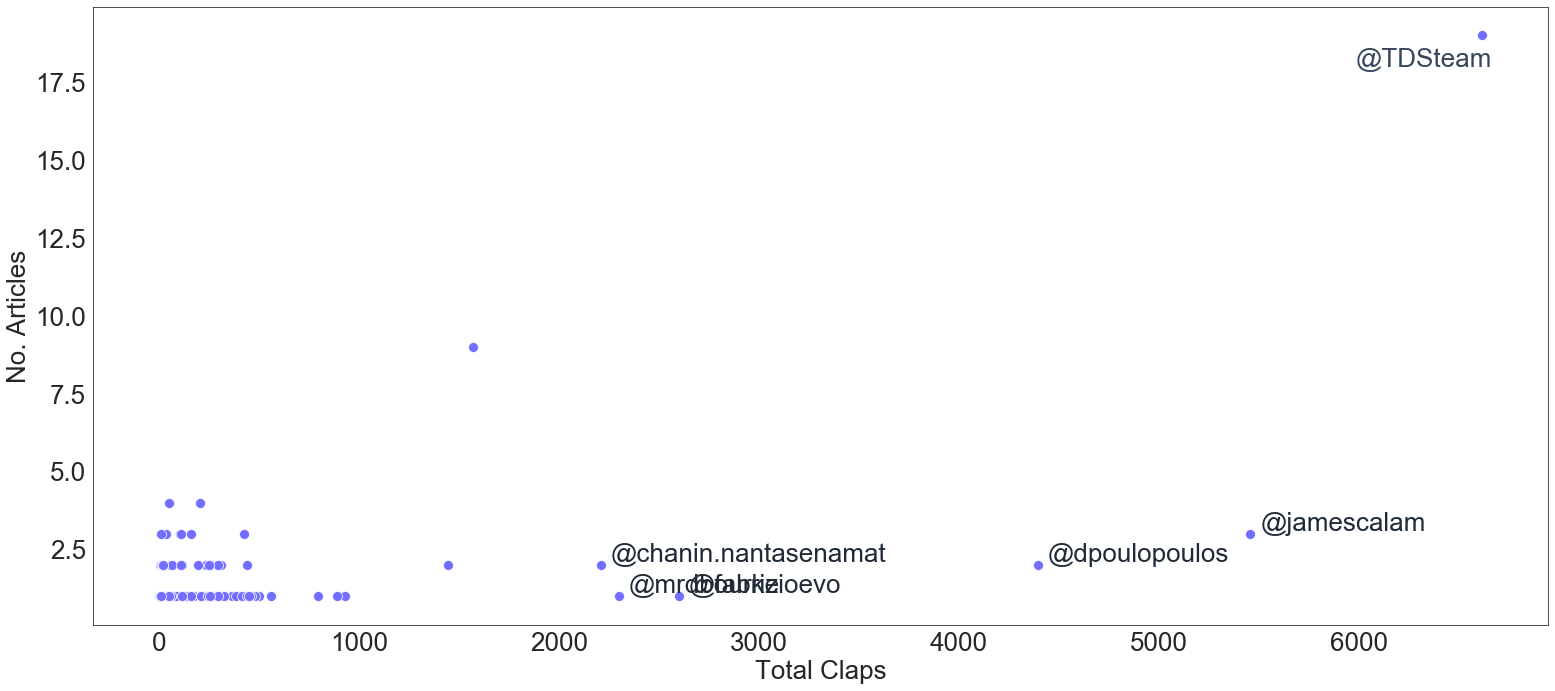

In [9]:
fig = plt.figure(figsize=(22,10))
sns.set_style('white')

p1 = sns.scatterplot(x=[x[0] for x in claps], y=[y[0] for y in count], color='#726EFF', s=100)

for i in range(len(claps)):
    if (2000 < claps[i][0] < 6000):
        p1.text(claps[i][0]+50, count[i][0]+.1, claps[i][1], color='#212B38')
    if (claps[i][0] > 6000):
        p1.text(claps[i][0]+50, count[i][0]-1, claps[i][1], color='#37465B',
                horizontalalignment='right')

plt.xlabel('Total Claps')
plt.ylabel('No. Articles')
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.savefig('../assets/claps_counts.png')

plt.show()

In [10]:
metrics.language

{'content': {'towards': {'count': 87, 'claps/word': 55.573672243822884},
  'data': {'count': 3137, 'claps/word': 724.4629336180707},
  'science': {'count': 401, 'claps/word': 209.3000037188598},
  'inc': {'count': 8, 'claps/word': 2.737372543763045},
  'operates': {'count': 5, 'claps/word': 2.5894798287899445},
  'independent': {'count': 32, 'claps/word': 6.995432241595269},
  'medium': {'count': 71, 'claps/word': 101.01624926392978},
  'publication': {'count': 12, 'claps/word': 48.50120139873991},
  'looking': {'count': 132, 'claps/word': 26.764555085217285},
  'writers': {'count': 16, 'claps/word': 20.369702018115007},
  'propose': {'count': 5, 'claps/word': 4.828928662879924},
  'uptodate': {'count': 4, 'claps/word': 2.588056308417133},
  'content': {'count': 101, 'claps/word': 34.52376000896178},
  'focused': {'count': 27, 'claps/word': 4.759260371511036},
  'machine': {'count': 469, 'claps/word': 181.93227598336463},
  'learning': {'count': 991, 'claps/word': 276.07597242010894},


In [11]:
word_count = {}
claps_word = {}
freq_dict = {}
ratio_dict = {}

for section in metrics.language:
    word_count[section] = []
    claps_word[section] = []
    freq_dict[section] = {}
    ratio_dict[section]= {}
    for word in metrics.language[section]:
        word_count[section].append((metrics.language[section][word]['count'], word))
        claps_word[section].append((metrics.language[section][word]['claps/word'], word))
        freq_dict[section][word] = metrics.language[section][word]['count']
        ratio_dict[section][word] = round(metrics.language[section][word]['claps/word']*1e12)

In [12]:
metrics.language

{'content': {'towards': {'count': 87, 'claps/word': 55.573672243822884},
  'data': {'count': 3137, 'claps/word': 724.4629336180707},
  'science': {'count': 401, 'claps/word': 209.3000037188598},
  'inc': {'count': 8, 'claps/word': 2.737372543763045},
  'operates': {'count': 5, 'claps/word': 2.5894798287899445},
  'independent': {'count': 32, 'claps/word': 6.995432241595269},
  'medium': {'count': 71, 'claps/word': 101.01624926392978},
  'publication': {'count': 12, 'claps/word': 48.50120139873991},
  'looking': {'count': 132, 'claps/word': 26.764555085217285},
  'writers': {'count': 16, 'claps/word': 20.369702018115007},
  'propose': {'count': 5, 'claps/word': 4.828928662879924},
  'uptodate': {'count': 4, 'claps/word': 2.588056308417133},
  'content': {'count': 101, 'claps/word': 34.52376000896178},
  'focused': {'count': 27, 'claps/word': 4.759260371511036},
  'machine': {'count': 469, 'claps/word': 181.93227598336463},
  'learning': {'count': 991, 'claps/word': 276.07597242010894},


In [13]:
#change the value in return to set the single color need, in hsl format.
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    colors = [
        '#726EFF',
        '#5AFFE7',
        '#08C6AB',
        '#37465B',
        '#212B38'
    ]
    return colors[np.random.randint(0, 5)]

## Visualizing Content

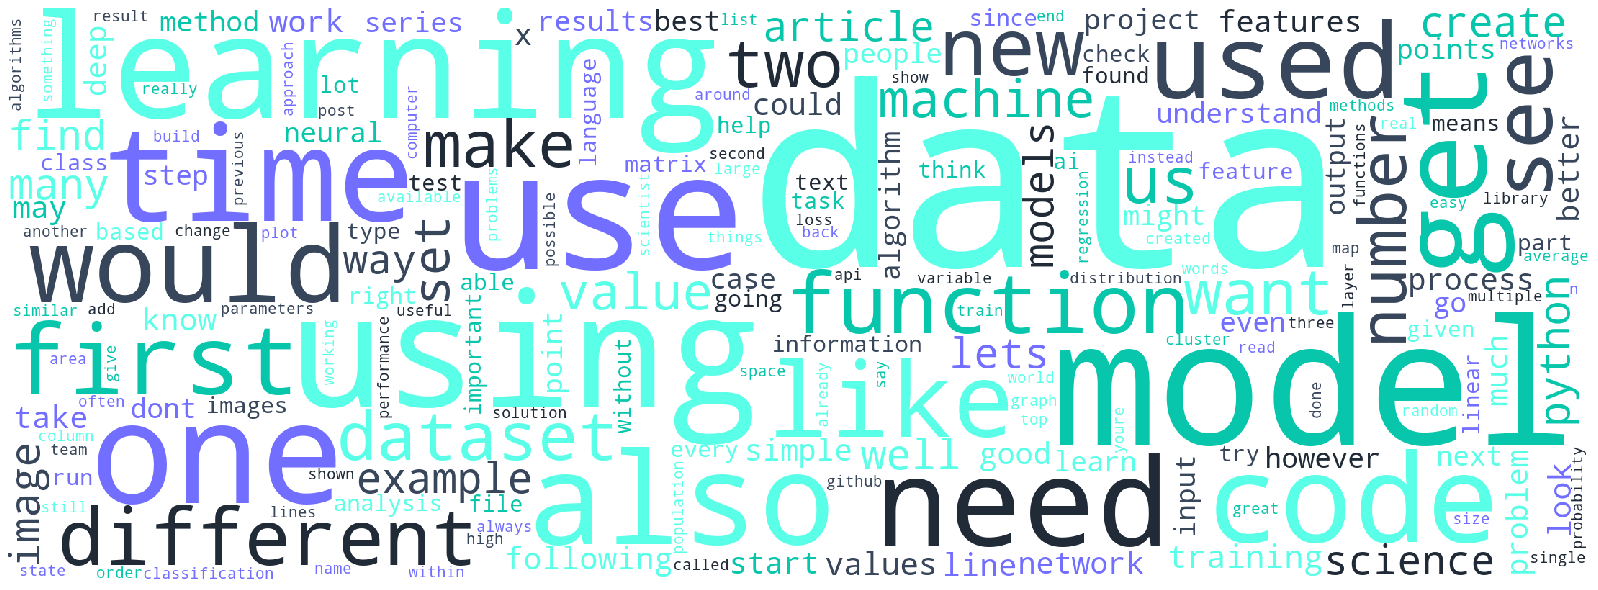

In [14]:
wordcloud = WordCloud(width = 2200, height = 800, 
                      background_color ='white',
                      min_font_size = 4).generate_from_frequencies(freq_dict['content']) 
#change the color setting
wordcloud.recolor(color_func = color_func)
  
# plot the WordCloud image                        
plt.figure(figsize = (22, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('../assets/word_freq_wordcloud.png')
plt.show()

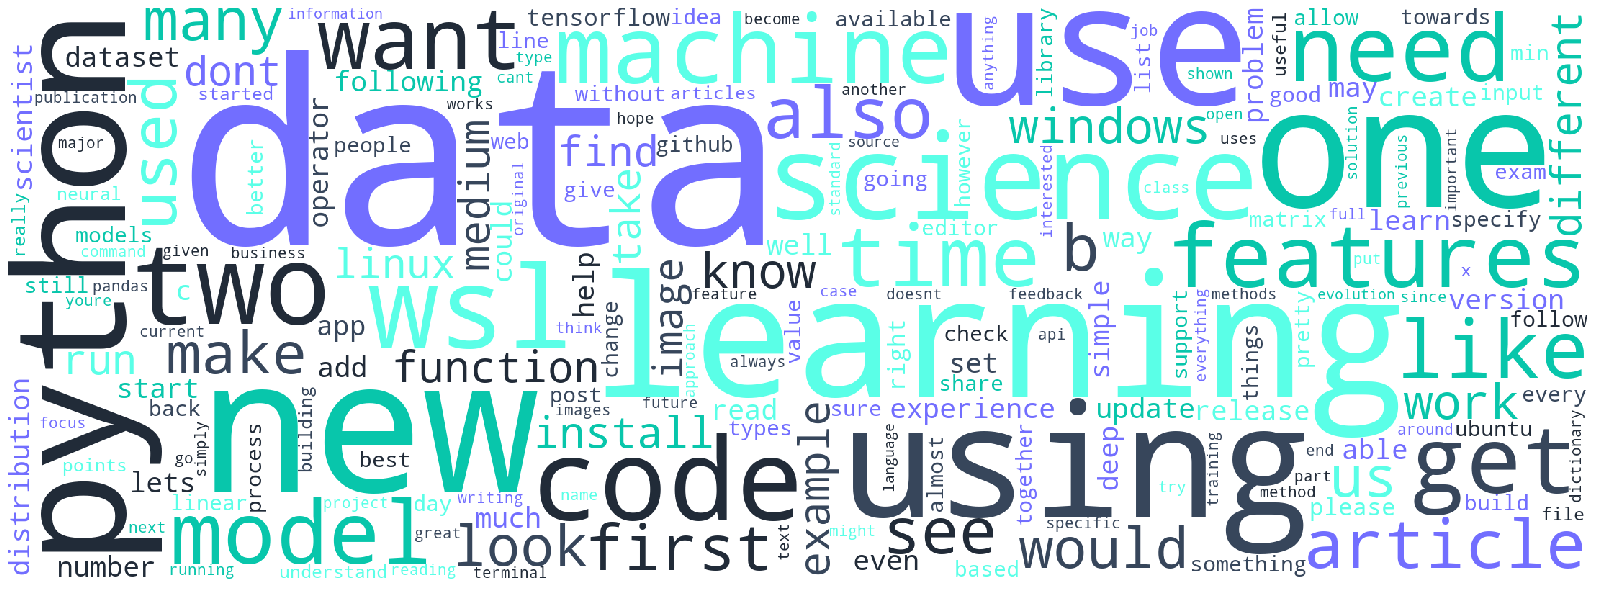

In [15]:
wordcloud = WordCloud(width = 2200, height = 800, 
                      background_color ='white',
                      min_font_size = 4).generate_from_frequencies(ratio_dict['content']) 
#change the color setting
wordcloud.recolor(color_func = color_func)
  
# plot the WordCloud image                        
plt.figure(figsize = (22, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('../assets/ratio_freq_wordcloud.png')
plt.show()

## Visualizing Titles

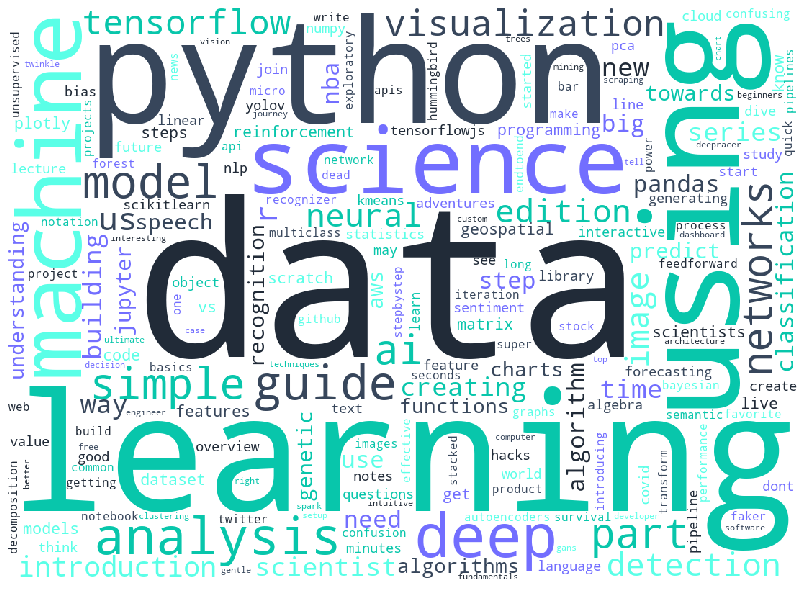

In [16]:
wordcloud = WordCloud(width = 1100, height = 800, 
                      background_color ='white',
                      min_font_size = 4).generate_from_frequencies(freq_dict['title']) 
#change the color setting
wordcloud.recolor(color_func = color_func)
  
# plot the WordCloud image                        
plt.figure(figsize = (11, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('../assets/word_freq_titles_wordcloud.png')
plt.show()

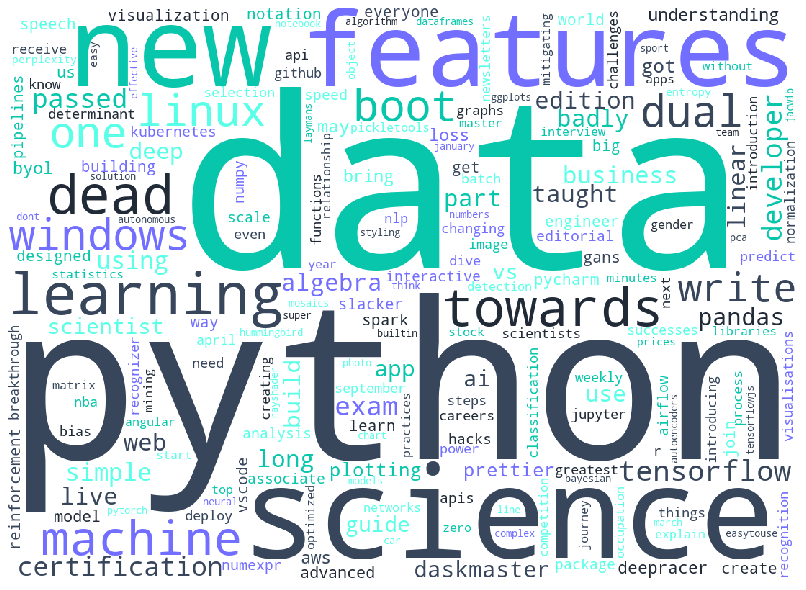

In [17]:
wordcloud = WordCloud(width = 1100, height = 800, 
                      background_color ='white',
                      min_font_size = 4).generate_from_frequencies(ratio_dict['title']) 
#change the color setting
wordcloud.recolor(color_func = color_func)
  
# plot the WordCloud image                        
plt.figure(figsize = (11, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('../assets/ratio_freq_titles_wordcloud.png')
plt.show()

## Visualizing Subtitles

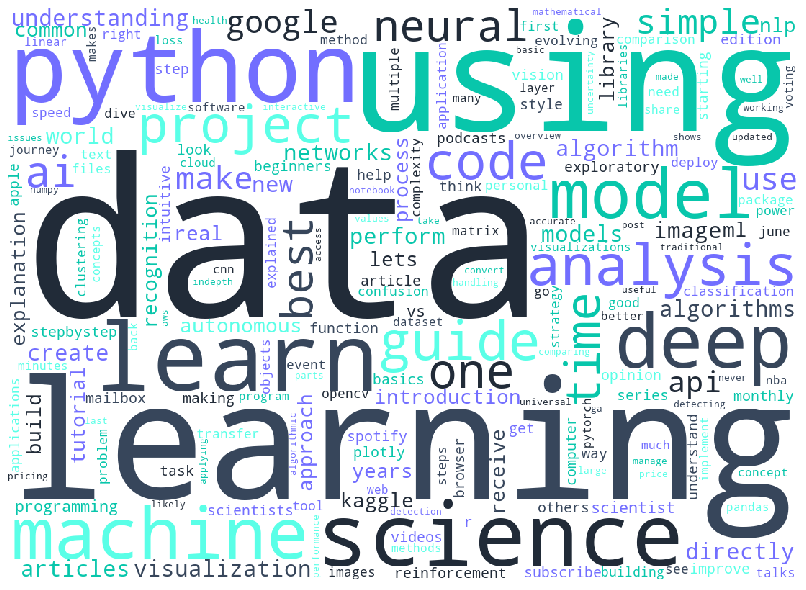

In [18]:
wordcloud = WordCloud(width = 1100, height = 800, 
                      background_color ='white',
                      min_font_size = 4).generate_from_frequencies(freq_dict['subtitle']) 
#change the color setting
wordcloud.recolor(color_func = color_func)
  
# plot the WordCloud image                        
plt.figure(figsize = (11, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('../assets/word_freq_subtitles_wordcloud.png')
plt.show()

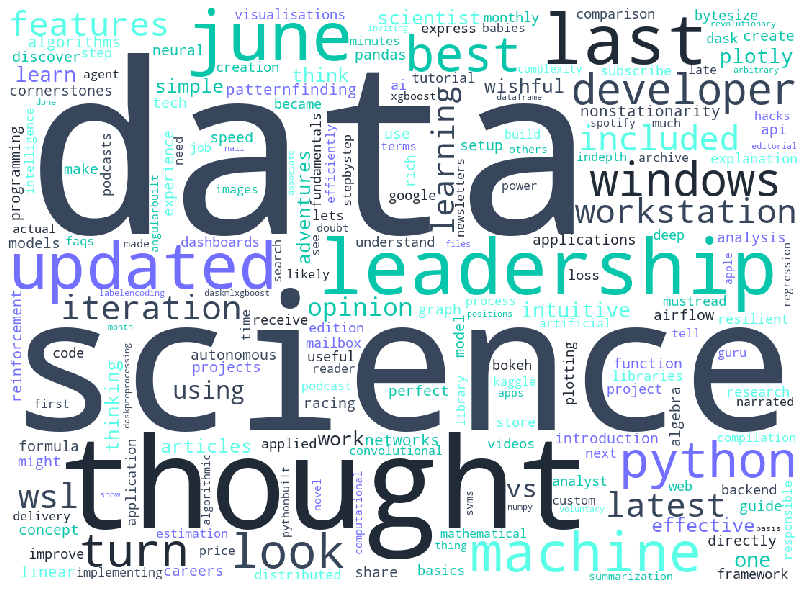

In [19]:
wordcloud = WordCloud(width = 1100, height = 800, 
                      background_color ='white',
                      min_font_size = 4).generate_from_frequencies(ratio_dict['subtitle']) 
#change the color setting
wordcloud.recolor(color_func = color_func)
  
# plot the WordCloud image                        
plt.figure(figsize = (11, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('../assets/ratio_freq_subtitles_wordcloud.png')
plt.show()

In [5]:
import requests
from bs4 import BeautifulSoup

html = requests.get('https://towardsdatascience.com/penguins-dataset-overview-iris-alternative-9453bb8c8d95').text
soup = BeautifulSoup(html)

In [6]:
article = soup.find('article')

In [8]:
h2 = article.findAll('h1')  # find all h2/subheader elements

In [9]:
article

<article><section class="da db dc dd ai de df r"></section><span class="r"></span><div><div class="s u dg dh di dj"></div><section class="dk dl dm dn do"><div class="n p"><div class="z ab ac ae af dp ah ai"><div><h1 class="dq dr ds as dt b du dv dw dx dy dz ea eb ec ed ee ef eg eh ei ej" id="82e0">Penguins Dataset Overview — iris alternative</h1></div><h2 class="ek dr aw as ar cl el em en eo ep eq er es et eu ev ew ex ey ez fa" id="b50a">A simple iris-like dataset to teach Data Science Concepts</h2><div class="fb"><div class="n fc fd fe ff"><div class="o n"><div><a href="/@amrwrites?source=post_page-----9453bb8c8d95----------------------" rel="noopener"><img alt="AbdulMajedRaja RS" class="r fg fh fi" height="48" src="https://miro.medium.com/fit/c/96/96/0*w0fQtGt26KJqthRE.jpg" width="48"/></a></div><div class="fj ai r"><div class="n"><div style="flex:1"><span class="ar b as at au av r ds q"><div class="fk n o fl"><span class="ar cl fm at br fn fo fp fq fr ds"><a class="cq cr ba bb bc bd

In [13]:
[elem.text for elem in article.findAll('p') if not elem.text.startswith('http')]

['I used to have an Apple laptop as my daily driver. I could do almost everything there; development, proposal writing, music composition etc. But the fear of vendor lock-in, the concern that I am depended on Apple’s whims and vices — which are arguably very expensive — led me to seek a new solution.',
 'I started building a machine learning workstation; a great CPU, lots of RAM and a competent GPU, among others. My OS of choice for almost anything was Ubuntu, except I needed Microsoft Office for proposal writing. Office online is just not there yet and, let’s face it, LibreOffice is a disaster. So, the solution was to dual boot Ubuntu and Windows 10. The freedom you experience moving from Apple to Ubuntu is unparalleled, and the options you have building your own PC are almost infinite.',
 'Dual boot was the answer for a long time. One million of context switches later, WSL came. Thus, I started moving a portion of my workflow to Windows. But still, there were many things missing. How